In [177]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steve-smith-all-international-cricket-centuries/Steve-Smith-All-International-Cricket-Centuries.csv


In [178]:
#Importing Libraries
import pandas as pd
import numpy as np

In [179]:
df=pd.read_csv("/kaggle/input/steve-smith-all-international-cricket-centuries/Steve-Smith-All-International-Cricket-Centuries.csv")
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,138*,England,5,1,"The Oval, Kennington",Away,21-Aug-13,Drawn
1,2,111,England,5,1,"WACA Ground, Perth",Home,13-Dec-13,Won
2,3,115,England,5,1,"Sydney Cricket Ground, Sydney",Home,03-Jan-14,Won
3,4,100,South Africa,6,1,"SuperSport Park, Centurion",Away,12-Feb-14,Won
4,5,101,Pakistan,3,1,"Sharjah Cricket Stadium, Sharjah",Neutral,07-Oct-14,Won


In [180]:
#About Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       44 non-null     int64 
 1   Score     44 non-null     object
 2   Against   44 non-null     object
 3   Position  44 non-null     int64 
 4   Innings   44 non-null     int64 
 5   Venue     44 non-null     object
 6   Ground    44 non-null     object
 7   Date      44 non-null     object
 8   Result    44 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.2+ KB


In [181]:
#Obj to DataTime
df['Date']=pd.to_datetime(df['Date'])

In [182]:
# Extracting month and year from date
df['month']=df['Date'].dt.month_name()
df['year']=df['Date'].dt.year

In [183]:
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,month,year
0,1,138*,England,5,1,"The Oval, Kennington",Away,2013-08-21,Drawn,August,2013
1,2,111,England,5,1,"WACA Ground, Perth",Home,2013-12-13,Won,December,2013
2,3,115,England,5,1,"Sydney Cricket Ground, Sydney",Home,2014-01-03,Won,January,2014
3,4,100,South Africa,6,1,"SuperSport Park, Centurion",Away,2014-02-12,Won,February,2014
4,5,101,Pakistan,3,1,"Sharjah Cricket Stadium, Sharjah",Neutral,2014-10-07,Won,October,2014


In [184]:
#Finding Numerical Columns in Dataset
num_col=[]
for col in df.columns:
    if(df[col].dtypes!='object'):
        num_col.append(col)
print(f"There are {len(num_col)} numerical columns in dataset")
print(num_col)

There are 5 numerical columns in dataset
['No.', 'Position', 'Innings', 'Date', 'year']


In [185]:
#Finding Categorical Columns in Dataset
cat_col=[]
for col in df.columns:
    if(df[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are {len(cat_col)} categorical columns in dataset")
print(cat_col)


There are 6 categorical columns in dataset
['Score', 'Against', 'Venue', 'Ground', 'Result', 'month']


In [186]:
#Null Values
pd.DataFrame(df.isnull().mean()*100)

,0
No.,0.0
Score,0.0
Against,0.0
Position,0.0
Innings,0.0
Venue,0.0
Ground,0.0
Date,0.0
Result,0.0
month,0.0


In [187]:
#Duplicate Values
df.duplicated().sum()

0

In [188]:
df.describe()

,No.,Position,Innings,year
count,44.000000,44.000000,44.000000,44.000000
mean,22.500000,3.704545,1.409091,2017.000000
std,12.845233,0.733882,0.658334,2.941286
min,1.000000,3.000000,1.000000,2013.000000
25%,11.750000,3.000000,1.000000,2015.000000
50%,22.500000,4.000000,1.000000,2016.000000
75%,33.250000,4.000000,2.000000,2019.000000
max,44.000000,6.000000,3.000000,2023.000000


In [189]:
#Highest Scores of Steve Smith Against Teams
pd.DataFrame(df.groupby('Against')['Score'].max().sort_values(ascending=False))

,Score
Against,
England,239
West Indies,200*
India,192
Pakistan,165*
New Zealand,164
Sri Lanka,145*
South Africa,108


In [190]:
#Minimum Scores in Centuries of Steve Smith Against Teams
pd.DataFrame(df.groupby('Against')['Score'].min().sort_values())

,Score
Against,
South Africa,100
Pakistan,101
England,102*
India,104
New Zealand,105
Sri Lanka,119
West Indies,134*


In [191]:
#Result Status Against Teams
pd.DataFrame(df.groupby('Against')['Result'].value_counts())

Result
Against       Result        
 England      Won         10
              Drawn        2
              TBD          1
 India        Won          8
              Drawn        4
              Lost         2
 New Zealand  Won          3
              Drawn        1
 Pakistan     Won          4
 South Africa Won          2
              Drawn        1
              Lost         1
 Sri Lanka    Lost         2
 West Indies  Won          3

In [192]:
#Ground Against Teams
pd.DataFrame(df.groupby('Against')['Ground'].value_counts())

Ground
Against       Ground         
 England      Away          7
              Home          6
 India        Home          9
              Away          4
              Neutral       1
 New Zealand  Home          3
              Away          1
 Pakistan     Home          3
              Neutral       1
 South Africa Away          2
              Home          2
 Sri Lanka    Away          2
 West Indies  Home          2
              Away          1

In [193]:
#Total of Innings Played In Different Years Against Teams
pd.DataFrame(df.groupby('Against')['year'].value_counts())

year
Against       year      
 England      2015     3
              2017     3
              2019     3
              2013     2
              2014     1
              2023     1
 India        2014     3
              2017     3
              2020     3
              2015     2
              2016     1
              2021     1
              2023     1
 New Zealand  2016     2
              2015     1
              2022     1
 Pakistan     2016     2
              2014     1
              2017     1
 South Africa 2014     2
              2016     1
              2023     1
 Sri Lanka    2016     1
              2022     1
 West Indies  2015     2
              2022     1

In [194]:
#Total of Innings Played In Different Venue
pd.DataFrame(df.groupby('Venue')['Innings'].sum().sort_values(ascending=False))

,Innings
Venue,
"WACA Ground, Perth",10
"Melbourne Cricket Ground, Melbourne",9
"Sydney Cricket Ground, Sydney",8
"The Gabba, Brisbane",5
"Edgbaston Cricket Ground, Birmingham",4
"The Oval, Kennington",3
"Maharashtra Cricket Association Stadium, Pune",3
"Lord's, London",2
"Bellerive Oval, Hobart",2


In [195]:
# Count of Result in Venues
pd.DataFrame(df.groupby('Venue')['Result'].value_counts())

,,Result
Venue,Result,
"Adelaide Oval, Adelaide",Won,1
"Bellerive Oval, Hobart",Won,1
"Cazalys Stadium, Cairns",Won,1
"Edgbaston Cricket Ground, Birmingham",Won,2
"Galle International Stadium, Galle",Lost,1
"HPCA Stadium, Dharamshala",Lost,1
"Hagley Oval, Christchurch",Won,1
"JSCA International Stadium Complex, Ranchi",Drawn,1
"Kingsmead Cricket Ground, Durban",Lost,1


In [196]:
#Overall Result in All Innings
# data.head()
pd.DataFrame(df.groupby('Result')['Innings'].sum().sort_values(ascending=False))


,Innings
Result,
Won,43
Drawn,12
Lost,6
TBD,1


In [197]:
#Overall Result in Grounds
pd.DataFrame(df.groupby('Ground')['Result'].value_counts())

Result
Ground  Result        
Away    Won          9
        Lost         5
        Drawn        2
        TBD          1
Home    Won         19
        Drawn        6
Neutral Won          2

In [198]:
# Matches Played in Months by Ground
pd.DataFrame(df.groupby('month')['Ground'].value_counts())

Ground
month     Ground         
August    Away          5
December  Home         10
February  Away          3
January   Home          7
          Away          1
July      Away          2
June      Away          2
          Neutral       1
March     Away          2
          Home          1
November  Home          6
October   Away          1
          Neutral       1
September Away          1
          Home          1

In [199]:
# Overall Innings Played in Months
pd.DataFrame(df.groupby('month')['Innings'].sum().sort_values(ascending=False))

,Innings
month,
December,15
January,11
November,10
August,8
February,6
June,3
March,3
July,2
October,2


In [200]:
# Overall Match Results by Years
pd.DataFrame(df.groupby('year')['Result'].value_counts(ascending=False))

Result
year Result        
2013 Drawn        1
     Won          1
2014 Won          6
     Drawn        1
2015 Won          6
     Drawn        2
2016 Won          5
     Lost         2
2017 Won          4
     Drawn        2
     Lost         1
2019 Won          3
2020 Won          2
     Lost         1
2021 Drawn        1
2022 Won          2
     Lost         1
2023 Drawn        1
     TBD          1
     Won          1

In [201]:
# Overall Innings Played in Years
pd.DataFrame(df.groupby('year')['Innings'].sum().sort_values(ascending=False))

,Innings
year,
2017,14
2015,11
2016,11
2014,9
2019,5
2020,3
2022,3
2023,3
2013,2


In [202]:
#Overall Maximum and Minimum Scores in Grounds
df.groupby('Venue')['Score'].agg(['max','min'])

,max,min
Venue,,
"Adelaide Oval, Adelaide",162*,162*
"Bellerive Oval, Hobart",102*,102*
"Cazalys Stadium, Cairns",105,105
"Edgbaston Cricket Ground, Birmingham",144,142
"Galle International Stadium, Galle",145*,145*
"HPCA Stadium, Dharamshala",111,111
"Hagley Oval, Christchurch",138,138
"JSCA International Stadium Complex, Ranchi",178*,178*
"Kingsmead Cricket Ground, Durban",108,108


In [203]:
# Maximum and Minimum Scores by Ground
df.groupby('Ground')['Score'].agg(['max','min'])

,max,min
Ground,,
Away,215,100
Home,239,102*
Neutral,121,101


In [204]:
# Maximum and Minimum Scores with Results
df.groupby('Result')['Score'].agg(['max','min'])

,max,min
Result,,
Drawn,192,102*
Lost,145*,108
TBD,110,110
Won,239,100


In [205]:
# VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Pie Graph of Grounds at played')

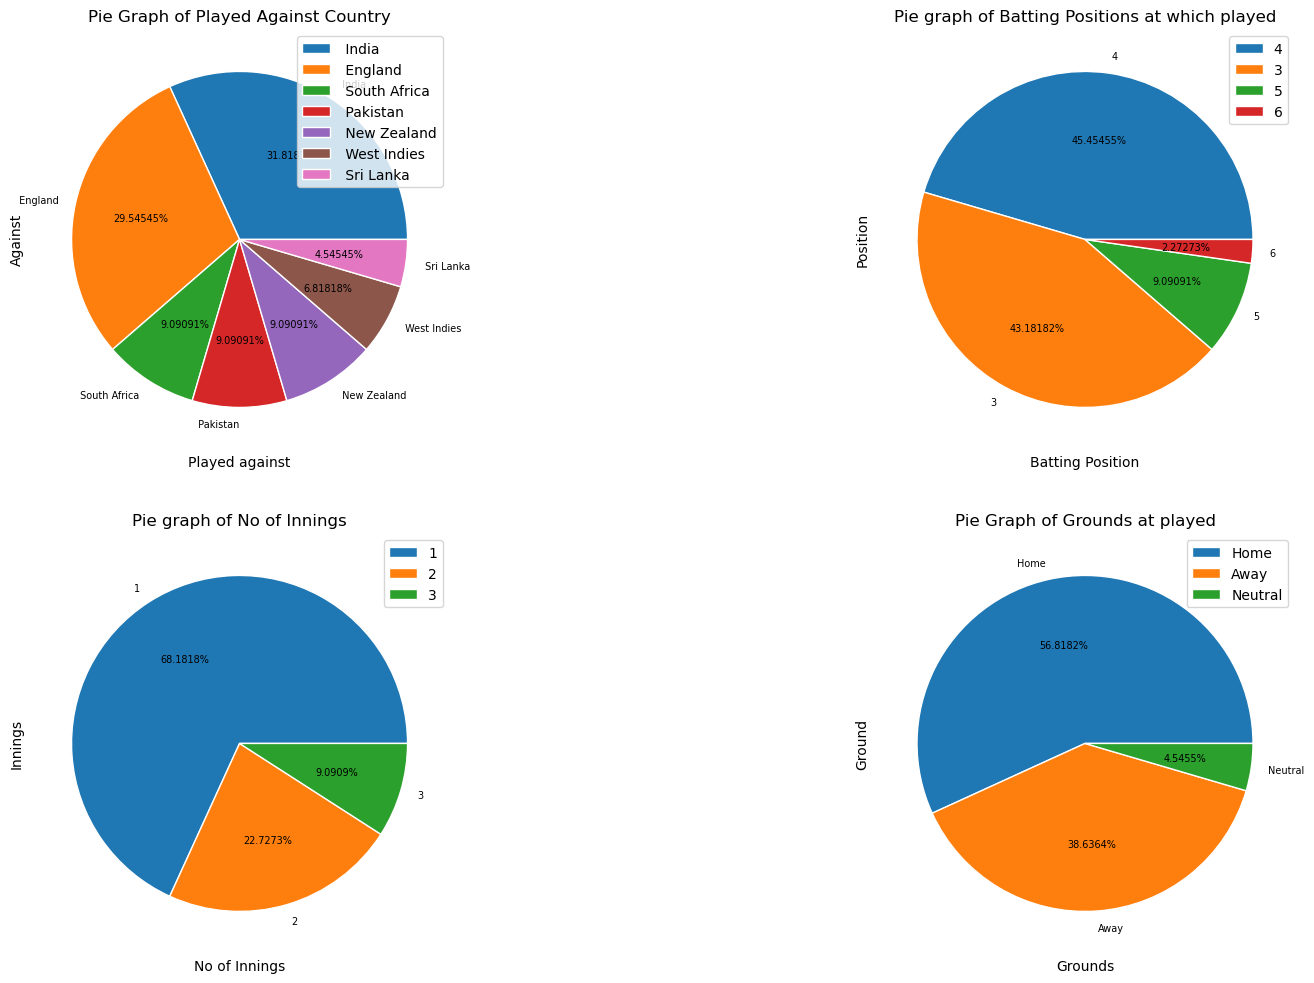

In [206]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
df['Against'].value_counts().plot.pie(autopct='%1.5f%%',startangle = 0,wedgeprops={'edgecolor': 'white'},textprops={'fontsize': 7})
plt.xlabel('Played against')
plt.legend()
# plt.ylabel('Pie Graph')
plt.title('Pie Graph of Played Against Country')
plt.subplot(2,2,2)
df['Position'].value_counts().plot.pie(autopct='%1.5f%%',startangle = 0,wedgeprops={'edgecolor': 'white'},textprops={'fontsize': 7})
plt.xlabel('Batting Position')
plt.legend()
# plt.ylabel('Played')
plt.title('Pie graph of Batting Positions at which played')
plt.subplot(2,2,3)
df['Innings'].value_counts().plot.pie(autopct='%1.4f%%',startangle = 0,wedgeprops={'edgecolor': 'white'},textprops={'fontsize': 7})
plt.xlabel('No of Innings')
plt.legend()
# plt.ylabel('played')
plt.title('Pie graph of No of Innings')
plt.subplot(2,2,4)
df['Ground'].value_counts().plot.pie(autopct='%1.4f%%',startangle = 0,wedgeprops={'edgecolor': 'white'},textprops={'fontsize': 7})
plt.xlabel('Grounds')
plt.legend()
# plt.ylabel('played')
plt.title('Pie Graph of Grounds at played')

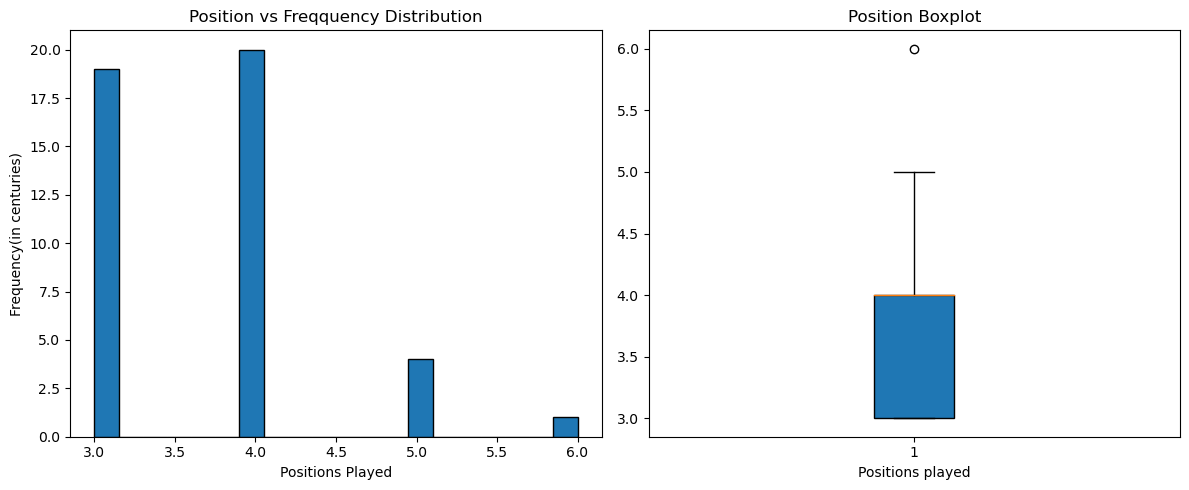

In [207]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['Position'], bins=20, edgecolor='black')
axes[0].set_xlabel('Positions Played')
axes[0].set_ylabel('Frequency(in centuries)')
axes[0].set_title('Position vs Freqquency Distribution')

# Box Plot
axes[1].boxplot(df['Position'],patch_artist=True)
axes[1].set_xlabel('Positions played')
axes[1].set_title('Position Boxplot')

plt.tight_layout()
plt.show()

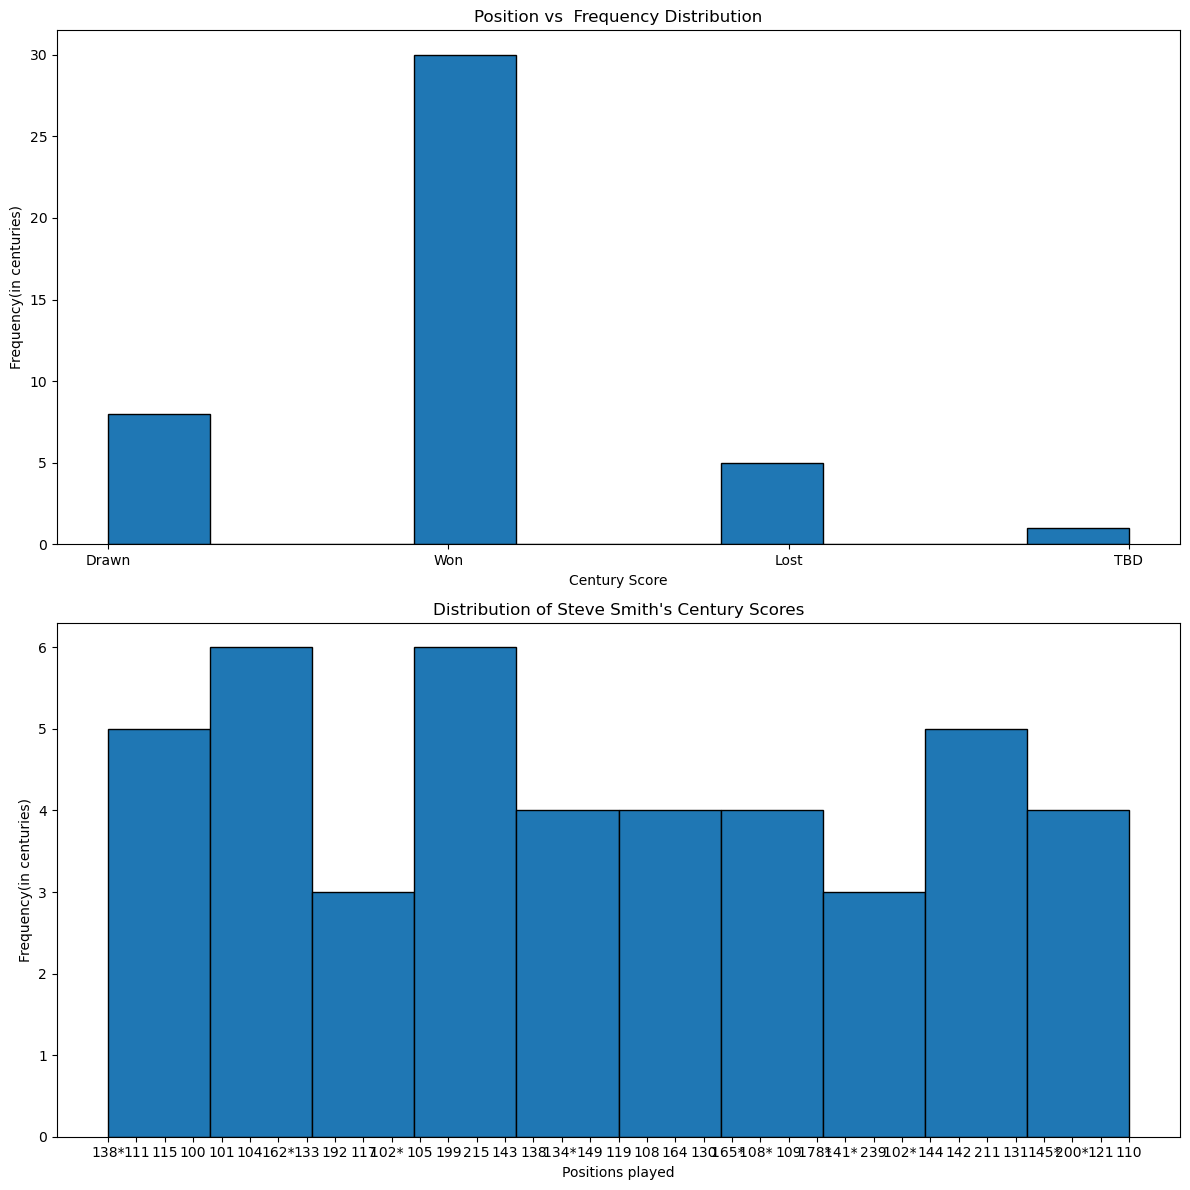

In [208]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
# fig, axes = plt.subplots(2,1,figsize=(12,12))
# Histogram
axes[0].hist(df['Result'], edgecolor='black')
axes[0].set_xlabel('Century Score')
axes[0].set_ylabel('Frequency(in centuries)')
axes[0].set_title('Position vs  Frequency Distribution')

# Histogram
axes[1].hist(df['Score'],edgecolor='black',bins=10)
axes[1].set_xlabel('Positions played')
# axes[1].set_xticks(fontsize=8)
axes[1].set_ylabel('Frequency(in centuries)')
axes[1].set_title('Distribution of Steve Smith\'s Century Scores')

plt.tight_layout()
plt.show()


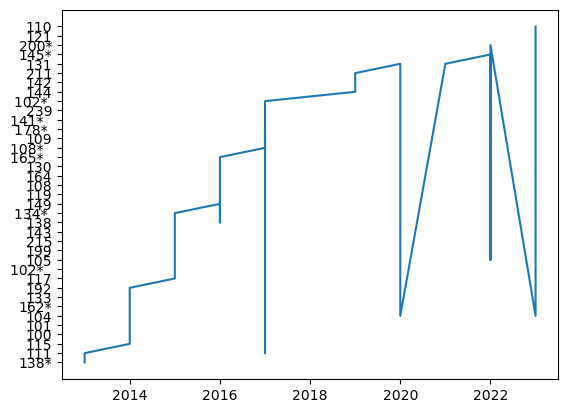

In [209]:
plt.plot(df['year'],df['Score'])

In [210]:
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,month,year
0,1,138*,England,5,1,"The Oval, Kennington",Away,2013-08-21,Drawn,August,2013
1,2,111,England,5,1,"WACA Ground, Perth",Home,2013-12-13,Won,December,2013
2,3,115,England,5,1,"Sydney Cricket Ground, Sydney",Home,2014-01-03,Won,January,2014
3,4,100,South Africa,6,1,"SuperSport Park, Centurion",Away,2014-02-12,Won,February,2014
4,5,101,Pakistan,3,1,"Sharjah Cricket Stadium, Sharjah",Neutral,2014-10-07,Won,October,2014


<Axes: xlabel='year', ylabel='Score'>

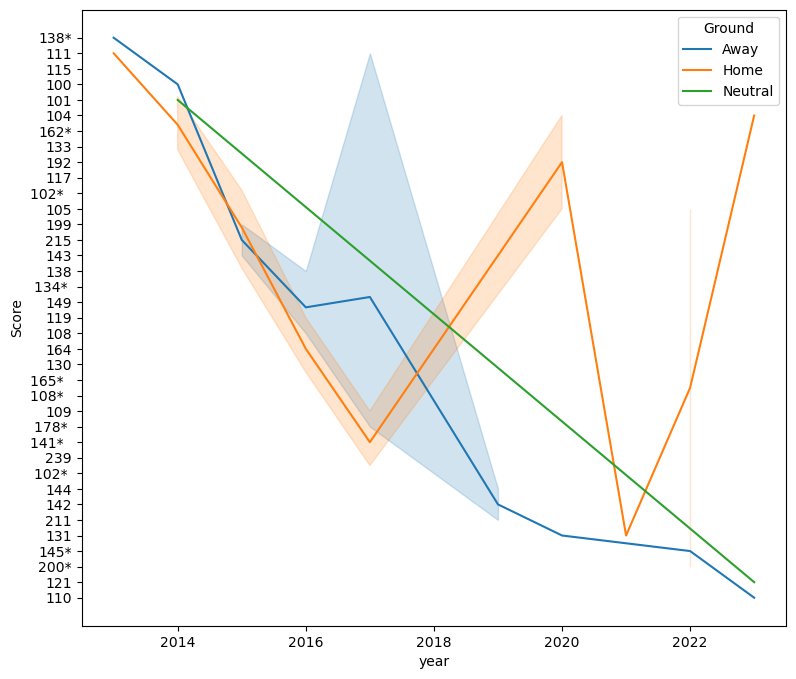

In [211]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
sns.lineplot(x='year',y='Score',data=df,hue='Ground')

<Axes: xlabel='year', ylabel='Score'>

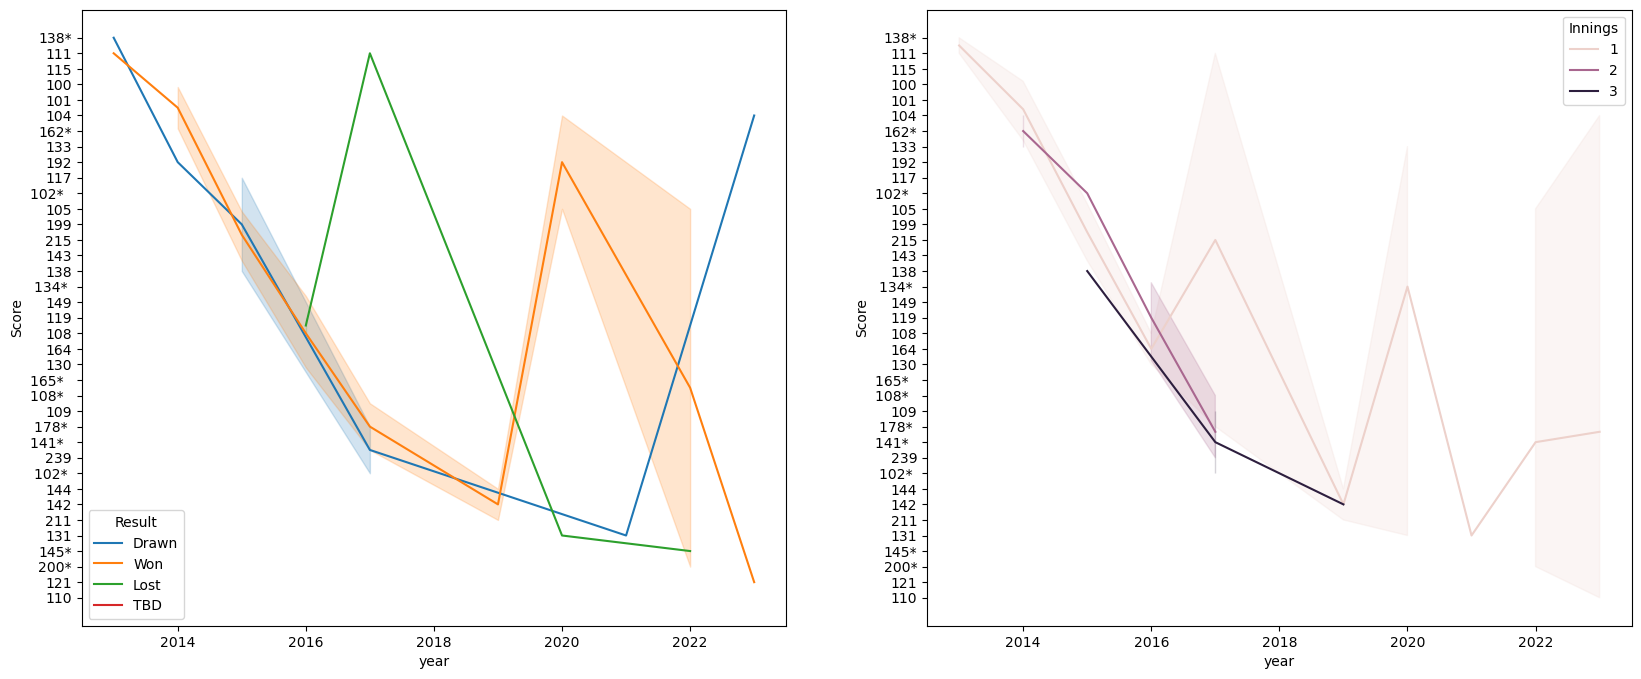

In [212]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='year',y='Score',data=df,hue='Result')
plt.subplot(1,2,2)
sns.lineplot(x='year',y='Score',data=df,hue='Innings')

<Axes: xlabel='year', ylabel='Score'>

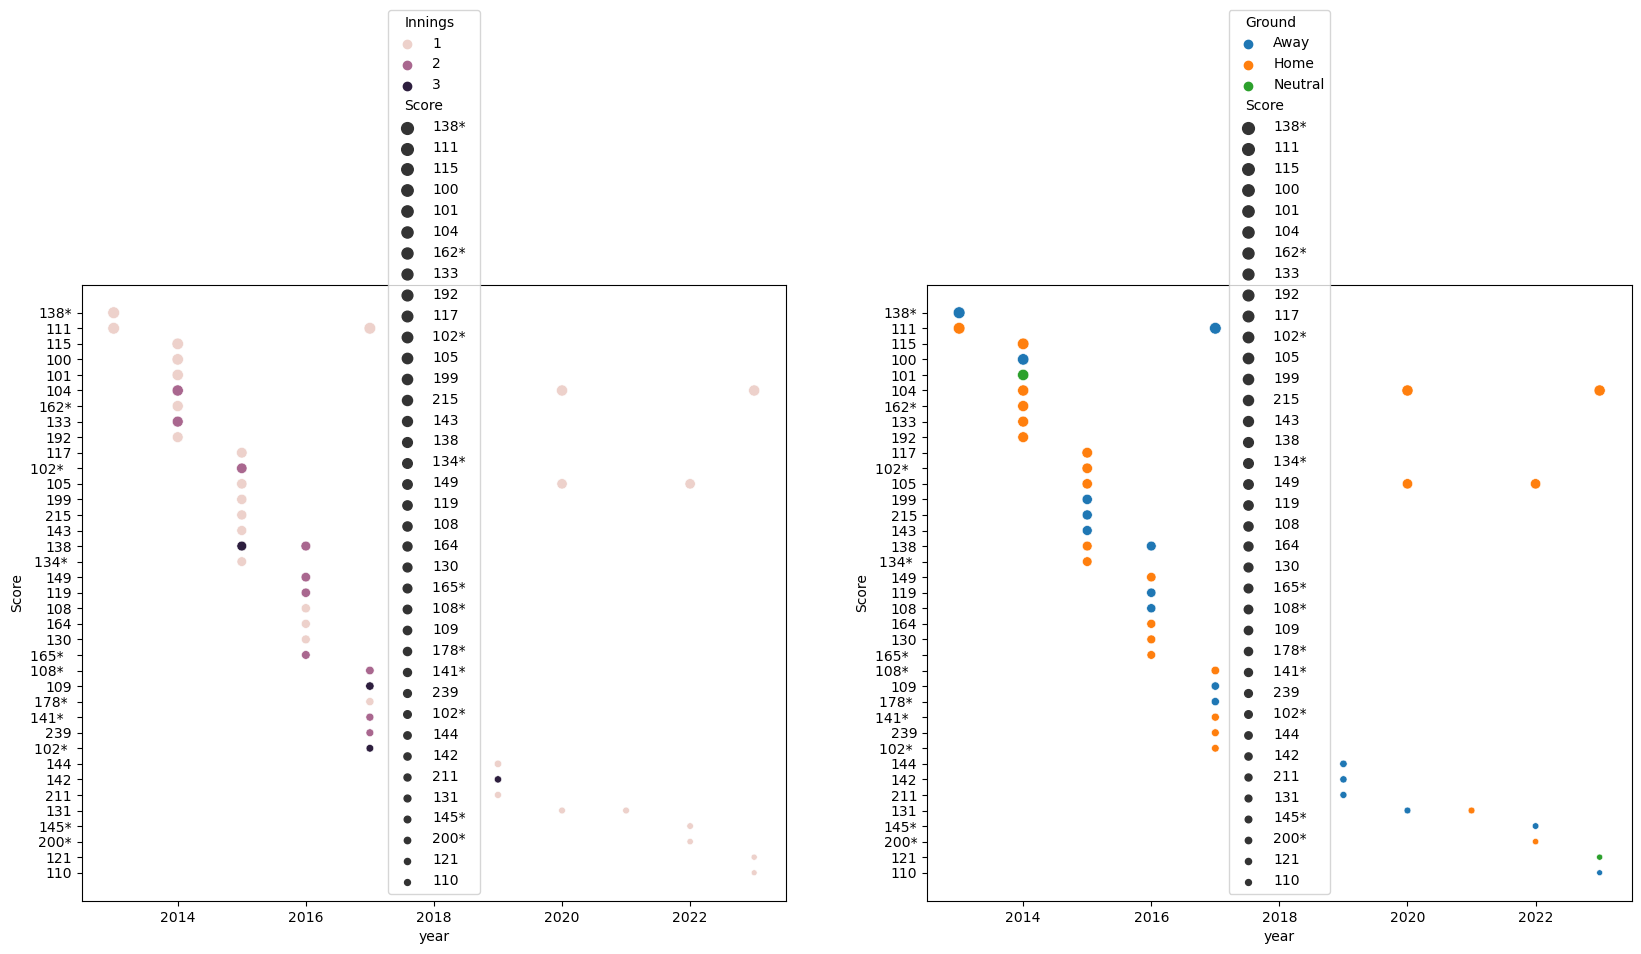

In [213]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x='year',y='Score',data=df,hue='Innings',size='Score')
plt.subplot(1,2,2)
sns.scatterplot(x='year',y='Score',data=df,hue='Ground',size='Score')